## Data-driven thermoelectrics

There is a growing number of open computational materials science databases that include [Materials Project](https://materialsproject.org), [NOMAD](https://nomad-lab.eu), [OQMD](https://oqmd.org), and [AFLOW](http://www.aflowlib.org).

An application programming interface (API) can be used via Python. Open Databases Integration for Materials Design ([OPTIMADE](https://www.optimade.org)) provides access to >20 databases and >20 million structures using a single interface.

In [ ]:
# Installation of libraries
%pip install optimade --quiet
%pip install "optimade[http_client]" --quiet
%pip install matminer --quiet
%pip install elementembeddings --quiet
%pip install pymatviz==0.16.0 --quiet
%pip install plotly --quiet

In [2]:
# Import of modules
import pandas as pd  # Data manipulation with DataFrames
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import pprint  # Pretty print data structures
import os  # Operating system functions

## Database queries

In the following Python code, OPTIMADE is used to query a database and retrieve structures that contain a specified number of elements.

The steps include:

* Initialise the OPTIMADE client: specify the database provider.

* Define a filter: set the criteria for filtering the materials data.

* Retrieve and process data: Query the database using the filter and process the retrieved data.

In [4]:
from optimade.client import OptimadeClient

# Initialise with specified provider
client = OptimadeClient(include_providers={"mp"})
   # Other providers include "mp", "alexandria", "oqmd", "jarvis", "aflow"

# Define a filter to find structures with exactly n elements
filters = ['nelements=8']

# Process each filter to fetch and display relevant data
for f in filters:
    # Retrieve data using the client
    result = client.get(f)

    if 'structures' in result and f in result['structures']:
        provider_data = next(iter(result['structures'][f].values()))
        structures_data = provider_data['data']

        # Print the count of structures found
        print(f"Count for filter '{f}': {len(structures_data)}")

        # Print a summary of each structure's ID and formula
        print("Summary of Compounds:")
        for structure in structures_data:
            structure_id = structure.get('id', 'No ID provided')
            formula = structure.get('attributes', {}).get('chemical_formula_descriptive', 'No formula provided')
            print(f"ID: {structure_id}, Formula: {formula}")
    else:
        print("No data found for this filter.")

Output()

Retrieved databases from mp

Output()

╭─────────────────────────────────────────────────╮
│ Performing query structures/?filter=nelements=8 │
╰─────────────────────────────────────────────────╯

Detected a running event loop (e.g., Jupyter). Attempting to switch to synchronous mode.

Count for filter 'nelements=8': 18
Summary of Compounds:
ID: mp-1214950, Formula: Ba2Ce2FeHNaO27Si8Ti2
ID: mp-1221604, Formula: Al4Ca2F8H4Mn2Na4O20P4
ID: mp-1201468, Formula: C4Cl4H24K2N4O8P2Pt2
ID: mp-1221055, Formula: Al6B3H3Mg2NaO31Si6V
ID: mp-863003, Formula: Al6B3FFe3H3NaO30Si6
ID: mp-1221086, Formula: B3Cr3H3Mg3NaO31Si6V3
ID: mp-1201374, Formula: Ag4C12Ca2Cs4H8N12O4S12
ID: mp-1221189, Formula: Ca7F4MnNa5O32Si8TiZr2
ID: mp-1221915, Formula: Ca4F2Fe2Mn2Na4O34Si8Zr4
ID: mp-562835, Formula: C18Cl4Co2Ga2H36N2O6P2
ID: mp-1223707, Formula: Fe2K2Li2Mn2Na4O48Si16Ti4
ID: mp-1224604, Formula: FeK2Li2Mn3Na4O48Si16Ti4
ID: mp-746679, Formula: C16Cl2Co2H48N2O8P4S8
ID: mp-728472, Formula: C16Cl2Fe2H48N2O8P4S8
ID: mp-1213587, Formula: Ba2K4MnNa4O58Si16Ti8W8
ID: mp-707264, Formula: C6Ca6F2H32Na2O50S2U2
ID: mp-1204081, Formula: C32Cu12H96I12Mo4N8O4S12
ID: mp-1204520, Formula: Ag4B40C60Cl8H160N4O12P8


For instance, consider the following example using the Materials Project API. This query is designed to search for materials that contain Li, have a band gap between 0.5 and 1.5 eV, and consist of either two or three elements:

```python
with MPRester(ACCESS_KEY, use_document_model=False) as mpr:
    docs = mpr.materials.summary.search(
        elements=["Li"],
        band_gap=(0.5,1.5),
        num_elements=(2,3),
        fields=['material_id', 'formula_pretty', 'band_gap', 'is_stable', 'theoretical']
       )

print("Number of binary and ternary Li containing compounds with a band gap between 0.5 and 1.5 eV: ", len(docs))
```

Running this requires getting your own [access key](https://next-gen.materialsproject.org/api#api-key).

## Chemical space of thermoelectric materials

Thermoelectric devices convert temperature differences directly into electrical voltage, enabling applications in power generation and refrigeration. Their efficiency is characterised by the dimensionless figure of merit (zT), which depends on electrical conductivity, Seebeck coefficient, and thermal conductivity (read more [here](https://www.nature.com/articles/nmat2090)).

In [5]:
import matminer  # Materials informatics
from matminer.datasets.dataset_retrieval import load_dataset  # Load materals datasets

print(matminer.datasets.dataset_retrieval.get_all_dataset_info('ucsb_thermoelectrics'))

Dataset: ucsb_thermoelectrics
Description: Database of ~1,100 experimental thermoelectric materials from UCSB aggregated from 108 source publications and personal communications. Downloaded from Citrine. Source UCSB webpage is http://www.mrl.ucsb.edu:8080/datamine/thermoelectric.jsp. See reference for more information on original data aggregation. No duplicate entries are present, but each src may result in multiple measurements of the same materials' properties at different temperatures or conditions.
Columns:
	composition: Chemical formula.
	crystallinity: Either single crystal, polycrystalline, or nanoparticles.
	synthesis: Brief string describing the synthesis method
	spacegroup: Spacegroup number, if available
	rho (ohm.cm): Electrical resistivity, in ohm.cm
	S [muV/K]: Seebeck coefficient, in microVolts/K, if available
	PF [W/mK^2]: Thermoelectric power factor, conductivity * Seebeck^2, in [W/mK^2] if available
	zT: Thermoelectric figure of merit, PF * T/K, unitless, if available

In [6]:
# Use matminer to download the dataset
df = load_dataset('ucsb_thermoelectrics')

print(f'The full dataset contains {df.shape[0]} entries. \n')
print('The DataFrame is shown below:')
df.head(10)

The full dataset contains 1093 entries. 

The DataFrame is shown below:


,composition,crystallinity,synthesis,spacegroup,rho (ohm.cm),S [muV/K],PF [W/mK^2],zT,kappa [W/mK],sigma [S/cm],T [K],src
1,Ti0.99Nb0.01NiSn,Polycrystalline,"Arc-melted, vacuum",216.0,0.001240,-192.458,0.002987,0.203822,5.861700,806.390,400.0,http://dx.doi.org/10.1016/j.jallcom.2008.02.041
2,Cu1.98Se,Polycrystalline,"Melted, vacuum",225.0,0.003250,201.500,0.001249,1.230837,1.015000,307.690,1000.0,http://dx.doi.org/10.1038/nmat3280
3,Bi2Te3,Single crystal,Melted,166.0,0.000450,-174.000,0.006728,0.502500,4.016716,2222.200,300.0,http://dx.doi.org/10.1201/9781420049718.ch19
4,Cr1.3Mo6S8,Polycrystalline,"Solid state reaction, vacuum",2.0,0.000693,51.220,0.000378,0.098456,2.690500,1442.400,700.0,http://dx.doi.org/10.1007/s11664-009-0975-0
5,LaNiO3,Polycrystalline,"Evaporate nitrates (1173 K, air)",167.0,0.004601,-25.760,0.000014,NaN,NaN,217.330,700.0,http://dx.doi.org/10.1557/PROC-793-S3.3
6,Bi1.2S1.2Ti2S4,Polycrystalline,"Solid-liquid-vapor reaction, vacuum",NaN,0.000324,-41.300,0.000526,0.053719,2.940000,3086.400,300.0,http://dx.doi.org/10.3390/ma3042606
7,Ba0.4Sr0.6PbO3,Polycrystalline,Solid state reaction (under oxygen),62.0,0.004128,-82.770,0.000166,0.021697,2.294800,242.260,300.0,http://dx.doi.org/10.1023/A:1018515223271
8,SrTi0.8Nb0.2O3,Polycrystalline,"Solid state reaction, Ar",140.0,0.001420,-62.400,0.000274,0.012720,8.620000,704.000,400.0,http://dx.doi.org/10.1063/1.3117943
9,CaMn0.98Ru0.02O3,Polycrystalline,Solid state reaction,62.0,0.024183,-195.780,0.000159,NaN,NaN,41.352,700.0,http://dx.doi.org/10.1016/S0025-5408(02)00997-2
10,Mg2Si0.997Bi0.003,Polycrystalline,"Mechanochemical, Ar",225.0,0.000488,-76.600,0.001202,0.058557,6.160000,2049.200,300.0,http://dx.doi.org/10.1039/C1JM10827A


In [7]:
# Display the columns of the dataset
print("Columns in the dataset:")
print(df.columns)

# Check for any missing values in the dataset
print("\nChecking for missing values:")
print(df.isnull().sum())

Columns in the dataset:
Index(['composition', 'crystallinity', 'synthesis', 'spacegroup',
       'rho (ohm.cm)', 'S [muV/K]', 'PF [W/mK^2]', 'zT', 'kappa [W/mK]',
       'sigma [S/cm]', 'T [K]', 'src'],
      dtype='object')

Checking for missing values:
composition        0
crystallinity      0
synthesis          8
spacegroup        13
rho (ohm.cm)       0
S [muV/K]          0
PF [W/mK^2]        0
zT               379
kappa [W/mK]     379
sigma [S/cm]       0
T [K]             11
src                7
dtype: int64


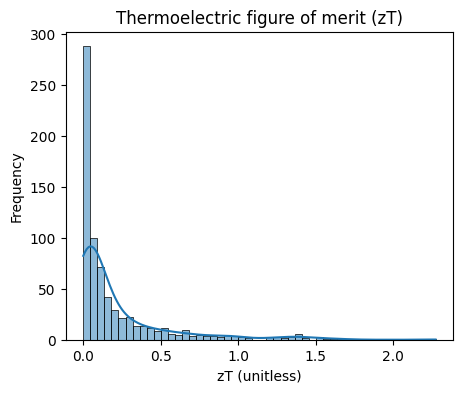

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of zT values
plt.figure(figsize=(5, 4))
sns.histplot(df['zT'], bins=50, kde=True)
plt.title('Thermoelectric figure of merit (zT)')
plt.xlabel('zT (unitless)')
plt.ylabel('Frequency')
plt.show()

## Unsupervised machine learning

Machine learning, such as Principal Component Analysis (PCA), can be used to visualise a set of materials with different compositions in two or three dimensions by reducing high-dimensional data into lower dimensions as [dimensionality reduction techniques](https://scikit-learn.org/stable/modules/manifold.html).

<details>
<summary> Overview of PCA </summary>
PCA is a popular technique for dimensionality reduction and data preprocessing, enabling the simplification of complex datasets. High-dimensional data is transformed into a new coordinate system where the axes align with the directions of maximum variance in the original data. These new axes, termed "principal components," are orthogonal. The first principal component captures the highest variance, the second captures the second highest, etc.

Key use cases include:

- **Dimensionality Reduction**: Identifying and eliminating less informative dimensions, reducing noise and computational complexity.

- **Data Visualisation**: Facilitating easier interpretation while preserving essential patterns.

- **Noise Reduction**: Filtering out noise or unimportant variations by focusing on significant variance.

- **Feature Engineering**: A preprocessing step to transform data before applying machine learning algorithms, potentially improving performance.

PCA workflow:

1. **Center the Data**: Subtract the mean from each feature to center the data around the origin.

   $
   X_{\text{centered}} = X - \bar{X}
   $

2. **Calculate Covariance Matrix**: Compute the covariance matrix to understand feature relationships and their [covariance](https://en.wikipedia.org/wiki/Covariance).

   $
   \text{Cov}(X) = \frac{1}{n}X_{\text{centered}}^T X_{\text{centered}}
   $

3. **Compute Eigenvalues and Eigenvectors**: Calculate eigenvalues ($\lambda_i$) and eigenvectors ($\mathbf{v}_i$) of the covariance matrix. Eigenvectors represent maximum variance directions, and eigenvalues quantify the variance magnitude.

   $
   \text{Cov}(X) \mathbf{v}_i = \lambda_i \mathbf{v}_i
   $

4. **Sort Eigenvalues**: Sort eigenvalues in descending order, rearranging corresponding eigenvectors accordingly.

5. **Select Principal Components**: Choose a subset of eigenvectors (principal components) based on eigenvalues, explaining the most variance in the data.

6. **Project Data**: Project original data onto selected principal components, yielding a lower-dimensional representation.

Note that PCA analysis is limited by its reliance on linear transformations of the data. In cases where non-linear structures are prominent, alternative techniques such as t-distributed Stochastic Neighbor Embedding (t-SNE) can be used.
</details>

In [18]:
from elementembeddings.composition import composition_featuriser

# Featurise compositions
magpie_df = composition_featuriser(df, formula_column="composition", embedding='magpie')
magpie_df.head()

Featurising compositions...


100%|██████████| 1093/1093 [00:00<00:00, 1108.60it/s]


Computing feature vectors...


100%|██████████| 1093/1093 [00:00<00:00, 444610.05it/s]


,composition,crystallinity,synthesis,spacegroup,rho (ohm.cm),S [muV/K],PF [W/mK^2],zT,kappa [W/mK],sigma [S/cm],...,mean_NValence,mean_NsUnfilled,mean_NpUnfilled,mean_NdUnfilled,mean_NfUnfilled,mean_NUnfilled,mean_GSvolume_pa,mean_GSbandgap,mean_GSmagmom,mean_SpaceGroupNumber
1,Ti0.99Nb0.01NiSn,Polycrystalline,"Arc-melted, vacuum",216.0,0.001240,-192.458,0.002987,0.203822,5.861700,806.39,...,12.677852,0.664430,0.671141,0.000000,0.0,1.335570,16.053221,0.268121,0.000000,154.194631
2,Cu1.98Se,Polycrystalline,"Melted, vacuum",225.0,0.003250,201.500,0.001249,1.230837,1.015000,307.69,...,21.200000,0.000000,2.400000,0.000000,0.0,2.400000,34.038000,0.278400,0.000000,96.000000
3,Bi2Te3,Single crystal,Melted,166.0,0.000450,-174.000,0.006728,0.502500,4.016716,2222.20,...,6.000000,0.477124,1.045752,2.385621,0.0,3.908497,20.587059,1.151373,0.000000,145.862745
4,Cr1.3Mo6S8,Polycrystalline,"Solid state reaction, vacuum",2.0,0.000693,51.220,0.000378,0.098456,2.690500,1442.40,...,6.200000,0.000000,1.200000,2.200000,0.0,3.400000,14.906500,0.000000,0.119079,91.000000
5,LaNiO3,Polycrystalline,"Evaporate nitrates (1173 K, air)",167.0,0.004601,-25.760,0.000014,NaN,NaN,217.33,...,8.809524,0.000000,1.666667,1.904762,0.0,3.571429,24.644256,1.363143,0.000005,91.238095


Shape of new features DataFrame after dropping old columns and NaNs: (1093, 22)


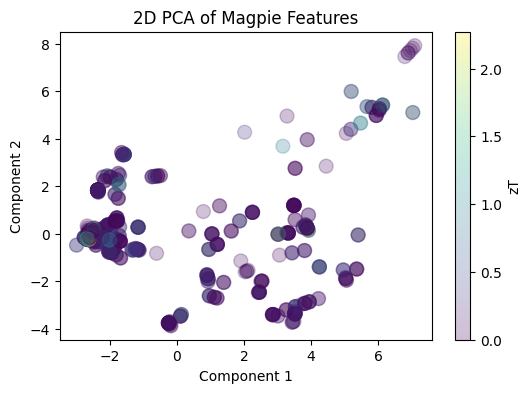

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select only the new features by dropping the original columns and handling NaNs
new_features_df = magpie_df.drop(columns=df.columns).dropna()
print(f"Shape of new features DataFrame after dropping old columns and NaNs: {new_features_df.shape}")

# Extract feature values
X = new_features_df.values
X_standardised = StandardScaler().fit_transform(X)

# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_standardised)

# Create a single plot for visualisation
fig, ax = plt.subplots(figsize=(6, 4))

# Select a label for coloring (assuming zT column exists in the original df)
color_map = df["zT"].values  # Use original DataFrame for the label (e.g., zT)

# Scatter plot in 2D space
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=color_map, cmap='viridis', alpha=0.25, s=100)

# Add labels and title
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_title("2D PCA of Magpie Features")

# Add colour bar
fig.colorbar(scatter, ax=ax, label="zT")

# Show the plot
plt.show()

Let’s check how much variance is captured by the first two principal components. Capturing above 50% of the variance with two dimensions is generally acceptable for initial exploration. However, for practical applications, the number of components should be increased to explain a higher proportion of the variance (e.g. 80%-90%) to ensure sufficient representation of the data.

In [20]:
pca.components_

array([[ 0.32811414,  0.03396974,  0.32390377,  0.20245907, -0.01386279,
         0.34858069,  0.3309942 , -0.27792562,  0.01323937, -0.1131101 ,
         0.284782  ,  0.15499236,  0.26639295, -0.01323937,  0.1839627 ,
         0.06463559, -0.0074512 ,  0.19472045,  0.31149072,  0.1018827 ,
         0.04134086,  0.24988607],
       [ 0.15384735,  0.35027008,  0.16599911, -0.28671106,  0.41542119,
         0.04717698, -0.14035088,  0.22891521,  0.03284135,  0.36651891,
         0.13858907,  0.29588144,  0.295584  , -0.03284135,  0.15619901,
        -0.24501551,  0.01037824, -0.1267811 , -0.0098829 , -0.04588224,
        -0.08989359, -0.23552172]])

In [21]:
# Check explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print(f"Explained variance by Component 1: {explained_variance[0]:.2f}")
print(f"Explained variance by Component 2: {explained_variance[1]:.2f}")
print(f"Cumulative variance explained by 2 components: {cumulative_variance[1]:.2f}")

Explained variance by Component 1: 0.35
Explained variance by Component 2: 0.20
Cumulative variance explained by 2 components: 0.55


What material each data point refers to can be seen by [Plotly](https://plotly.com/python/).

In [23]:
import plotly.express as px

# Add the zT column and composition column from the original DataFrame for coloring and hover info
plot_df = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])
plot_df['zT'] = df['zT'].values
plot_df['composition'] = df['composition'].values  # Assuming this is the column with chemical formulas

# Create an interactive scatter plot using Plotly
fig = px.scatter(
    plot_df,
    x='Component 1',
    y='Component 2',
    color='zT',
    color_continuous_scale='Viridis',
    opacity=0.6,
    hover_name='composition',  # Show chemical formula on hover
    hover_data={'Component 1': ':.2f', 'Component 2': ':.2f', 'zT': ':.2f'},  # Additional hover data
    labels={'zT': 'zT Value'}
)

fig.update_traces(marker=dict(size=10))  # Adjust the size value as needed

fig.update_layout(
    width=6*96,  # 6 inches converted to pixels
    height=4*96  # 4 inches converted to pixels
)

# Show the interactive plot
fig.show()

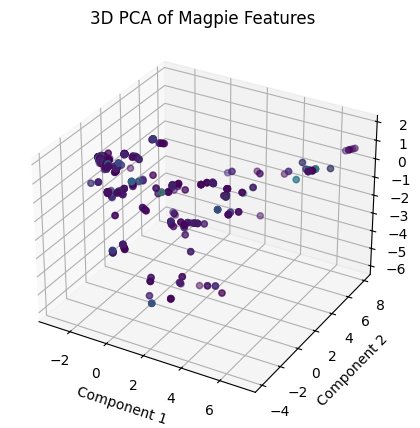

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA to reduce dimensionality to 3D
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X_standardised)

# Create a 3D plot for visualisation
fig = plt.figure(figsize=(6, 5))

# Create a 3D plot
ax = fig.add_subplot(111, projection='3d')
color_map = df["zT"].values
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=color_map, cmap='viridis', alpha=0.5)

# Add labels and title
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.set_title("3D PCA of Magpie Features")

# Show the plot
plt.show()